In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import rasterio
import numpy as np
import seaborn as sns


# Load the shapefile
shp_path = r"Shape_Data\local_unit.shp"
local_units = gpd.read_file(shp_path)


# Load GeoPackage files
admin_regions = gpd.read_file(r"data\nepal_admin_regions.gpkg")
glaciers = gpd.read_file(r"data\nepal_glaciers.gpkg")
rivers = gpd.read_file(r"data\nepal_rivers.gpkg")

# Load raster data nepal_temperature_2020.tif file
raster_path1 = r"data\nepal_temperature_2020.tif"
with rasterio.open(raster_path1) as src:
    nepal_temperature_2020 = src.read(1)  # Read first band
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
# Load raster data nepal_temperature_2020.tif file
raster_path2 = r"data\nepal_temperature_2050.tif"
with rasterio.open(raster_path2) as src:
   nepal_temperature_2050 = src.read(1)  # Read first band
   extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
# Load raster data nepal_precipitation_2020.tif file
raster_path3 = r"data\nepal_precipitation_2020.tif"
with rasterio.open(raster_path3) as src:
    nepal_precipitation_2020 = src.read(1)  # Read first band
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
# Load raster data nepal_precipitation_2050.tif file
raster_path4 = r"data\nepal_precipitation_2050.tif"
with rasterio.open(raster_path4) as src:
   nepal_precipitation_2050 = src.read(1)  # Read first band
   extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]


            
       

# Precipitation Change from 2020 to 2050

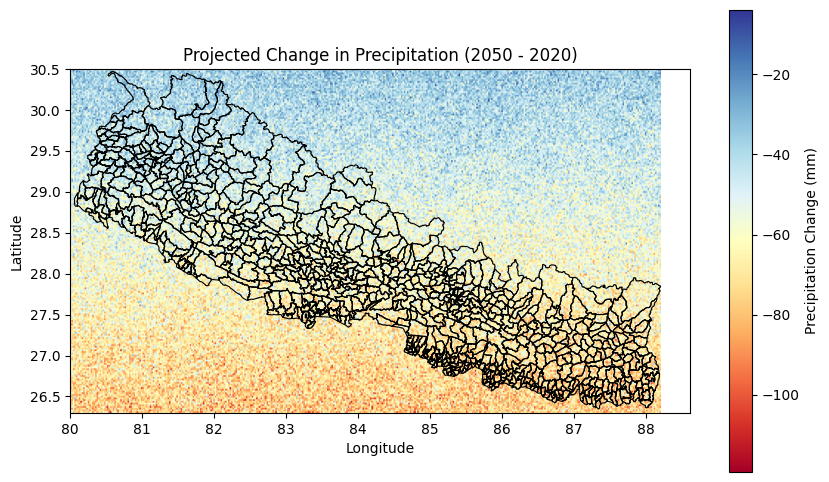

In [17]:

# Compute difference (2050 - 2020)
precip_change = nepal_temperature_2050 - nepal_precipitation_2020

# Plot precipitation change
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(precip_change, cmap="RdYlBu", extent=extent)
plt.colorbar(im, label="Precipitation Change (mm)")

# Overlay local boundaries
local_units.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)

# Customize plot
plt.title("Projected Change in Precipitation (2050 - 2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

# Tempaature Change from 2020 to 2050

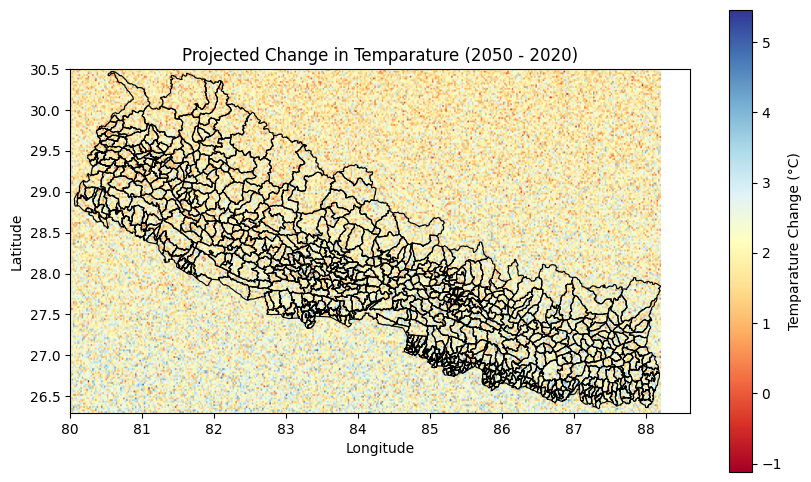

In [18]:
# Compute difference (2050 - 2020)
temp_change = nepal_temperature_2050 - nepal_temperature_2020

# Plot precipitation change
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(temp_change, cmap="RdYlBu", extent=extent)
plt.colorbar(im, label="Temparature Change (°C)")

# Overlay local boundaries
local_units.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)

# Customize plot
plt.title("Projected Change in Temparature (2050 - 2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

# Temperature Distribution with Local Boundaries

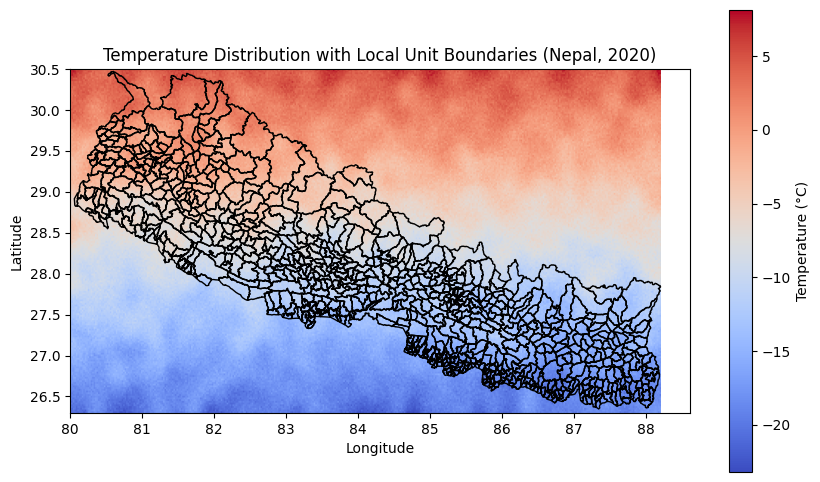

In [19]:
# Overlay local unit boundaries over Temparature

# Plot raster data(Temparature2020)
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(nepal_temperature_2020, cmap="coolwarm", extent=extent, alpha=0.7)
plt.colorbar(ax.imshow(nepal_temperature_2020, cmap="coolwarm", extent=extent), label="Temperature (°C)")
# local unit boundaries plot
local_units.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
# Customize the plot
plt.title("Temperature Distribution with Local Unit Boundaries (Nepal, 2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Overlay River over  Temparature

C:\Users\personal\AppData\Local\Temp\ipykernel_12928\3820627847.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\personal\AppData\Local\Temp\ipykernel_12928\3820627847.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


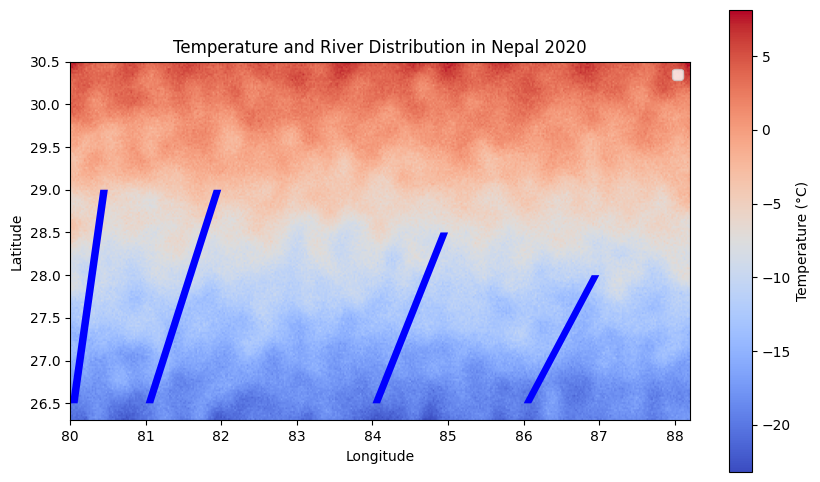

In [22]:
  # Overlay River over  Temparature2020
fig, ax = plt.subplots(figsize=(10, 6))
# Plot raster(Temparature)
ax.imshow(nepal_temperature_2020, cmap="coolwarm", extent=extent, alpha=0.6)
plt.colorbar(ax.imshow(nepal_temperature_2020, cmap="coolwarm", extent=extent), label="Temperature (°C)")
# Plot rivers
rivers.plot(ax=ax, color="blue", linewidth=1, label="Rivers")
plt.legend()
plt.title("Temperature and River Distribution in Nepal 2020")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


#                                       Exploratory Data Analysis (EDA):


## 1. Compute basic statistics (mean, median, min, max) of relevant climate variables.
### We will extract statistics from temperature (2020) and precipitation (2020 & 2050) raster datasets.

In [24]:
# Remove NoData values (-9999 or NaN)
nepal_temperature_2020 = nepal_temperature_2020[nepal_temperature_2020 > -9999]
nepal_temperature_2050 = nepal_temperature_2050[nepal_temperature_2050 > -9999]

nepal_precipitation_2020 = nepal_precipitation_2020[nepal_precipitation_2020 > -9999]
nepal_precipitation_2050 = nepal_precipitation_2050[nepal_precipitation_2050 > -9999]

# Compute statistics
def compute_stats(data, name):
    print(f"\n {name} Statistics:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data):.2f}")
    print(f"Min: {np.min(data):.2f}")
    print(f"Max: {np.max(data):.2f}")

compute_stats(nepal_temperature_2020, "Temperature (2020)")
compute_stats(nepal_temperature_2050, "Temperature (2050)")
compute_stats(nepal_precipitation_2020, "Precipitation (2020)")
compute_stats(nepal_precipitation_2050, "Precipitation (2050)")


 Temperature (2020) Statistics:
Mean: -7.58
Median: -7.69
Min: -23.20
Max: 8.14

 Temperature (2050) Statistics:
Mean: -5.47
Median: -5.58
Min: -22.09
Max: 11.47

 Precipitation (2020) Statistics:
Mean: 50.84
Median: 50.37
Min: 6.86
Max: 102.83

 Precipitation (2050) Statistics:
Mean: 48.29
Median: 46.74
Min: -6.41
Max: 134.97


## 2. Identify Trends & Patterns

### a. Temperature Distribution

C:\Users\personal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


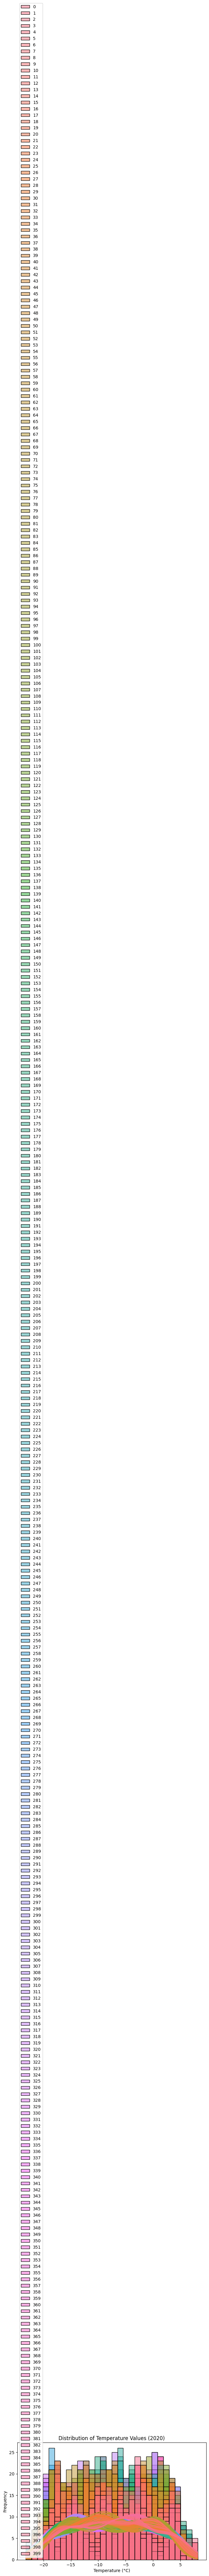

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(nepal_temperature_2020, bins=30, kde=True, color="red")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature Values (2020)")
plt.show()

### b.Compare Precipitation Trends (Box Plot)

C:\Users\personal\AppData\Local\Temp\ipykernel_12928\561414467.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Year", y="Precipitation", data=precip_df, palette=["blue", "orange"])


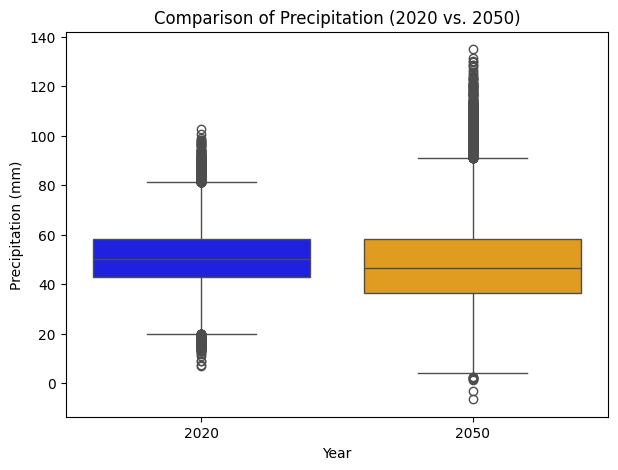

In [ ]:
# Convert raster data into pandas-friendly format
nepal_precipitation_2020= nepal_precipitation_2020.flatten()  # Flatten 2D to 1D
nepal_precipitation_2050= nepal_precipitation_2050.flatten()  # Flatten 2D to 1D
precip_df = pd.DataFrame({
    "Year": ["2020"] * len(nepal_precipitation_2020) + ["2050"] * len(nepal_precipitation_2050),
    "Precipitation": np.concatenate((nepal_precipitation_2020, nepal_precipitation_2050))
})

# Plot boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x="Year", y="Precipitation", data=precip_df, palette=["blue", "orange"])
plt.title("Comparison of Precipitation (2020 vs. 2050)")
plt.ylabel("Precipitation (mm)")
plt.xlabel("Year")
plt.show()